# Tidy Data
What is it??

References: 
* https://vita.had.co.nz/papers/tidy-data.pdf
* https://en.wikipedia.org/wiki/Tidy_data

From Hadley Wickham in pt. 4 of the above paper: 
> Tidy data is only worthwhile if it makes analysis easier.

From this, I sense another question. 
_**What are we trying to analyze?**_

In the end, tidy data is contextual. 
There are some common methods to help reach a tidy dataset, but variable and observation definitions change depending on your goal.
In general, a good process to understanding how to tidy your data may be:
1. Determine a question
2. Figure out which `variables` are needed to define your `observation`
3. _Tidy your data_
4. Answer your question

**Note that tidying your data doesn't come until step 3!!**

With that, let's look at an example case study on individual-level mortality data from Mexico.

**The Goal**
> Find causes of death with unusual temporal patterns within a day.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

PLOT_TITLE_FONTDICT = {
    'fontsize': 'xx-large',
    'fontweight' : 'heavy'}

PLOT_TICK_FONTDICT = {
    'fontsize': 'x-large',
    'fontweight' : 'demibold'}

In [2]:
deaths = pd.read_csv('./../../data/10_26_2019/deaths08.csv')
deaths.head()

,yob,mob,dob,sex,age_unit,age,nation,marital,stateL,countyL,locationL,popL,job,edu,derhab,statD,countyD,locationD,popD,placeD,yod,mod,dod,hod,minod,med_help,cod,des,presume,working,injury_loc,domestic_v,autopsy,certifier,state_reg,county_reg,year_reg,mon_reg,day_reg,weight,year_cert,mon_cert,day_cert,pregnant,labor_cod,labor_c
0,1918,0,0,1,A,90.0,1.0,2.0,1.0,1.0,239.0,3.0,2.0,2.0,3.0,1.0,1.0,239.0,3.0,11.0,2008.0,1.0,7.0,20.0,15.0,1.0,F17,2,8.0,8.0,88.0,8.0,2.0,1.0,1.0,1.0,2008.0,1.0,8.0,8888.0,2008.0,1.0,7.0,8.0,8.0,8.0
1,1936,0,0,1,A,72.0,1.0,2.0,1.0,1.0,237.0,3.0,41.0,3.0,2.0,1.0,1.0,1.0,15.0,3.0,2008.0,1.0,13.0,14.0,25.0,1.0,I05,9,8.0,8.0,88.0,8.0,2.0,3.0,1.0,1.0,2008.0,1.0,14.0,8888.0,2008.0,1.0,13.0,8.0,8.0,8.0
2,1959,0,0,1,A,49.0,1.0,5.0,33.0,0.0,0.0,0.0,41.0,3.0,1.0,1.0,1.0,1.0,15.0,9.0,2008.0,1.0,12.0,20.0,40.0,1.0,K65,0,8.0,8.0,88.0,8.0,2.0,1.0,1.0,1.0,2008.0,1.0,17.0,8888.0,2008.0,1.0,12.0,8.0,8.0,8.0
3,1929,0,0,2,A,79.0,1.0,5.0,1.0,1.0,237.0,3.0,2.0,2.0,7.0,1.0,1.0,237.0,3.0,11.0,2008.0,1.0,20.0,10.0,30.0,1.0,I38,X,8.0,8.0,88.0,8.0,2.0,3.0,1.0,1.0,2008.0,1.0,21.0,8888.0,2008.0,1.0,20.0,8.0,8.0,8.0
4,1993,0,0,1,A,15.0,1.0,1.0,1.0,1.0,479.0,4.0,2.0,2.0,0.0,1.0,1.0,479.0,4.0,11.0,2008.0,1.0,1.0,15.0,0.0,1.0,N18,9,8.0,8.0,88.0,8.0,0.0,1.0,1.0,1.0,2008.0,1.0,2.0,8888.0,2008.0,1.0,1.0,8.0,8.0,8.0


In [3]:
'Dataset has {} rows and {} columns.'.format(*deaths.shape)

'Dataset has 128641 rows and 46 columns.'

<hr>

## Step 1: Asking a question
Let's start with something pretty simple

### What hour of the day do the most deaths occur?

<hr>

## Step 2: Figure out which `variables` are needed to define your `observation`
First, what are variables and observations?

### Variable
`A variable contains all values that measure the same underlying attribute across units (groups)`

### Observation
`An observation contains all values measured on the same unit across attributes (values specific to combination of groups)`

### What variables are in play?
Only one here. 
* `hod`: Categorical group. Hour from 0-23

### What is our observation?
* `death count`: number of deaths per hour from the entire dataset

## Step 3: Tidy your data
Group by hour, and get an overall count!

* Target column we're interested in
* Effectively create a blank column to count on
* Establish the group
* Perform aggregation
* Back to a normal dataframe
* Rename column so it's easy to interpret

In [4]:
death_count_per_hour = deaths[['hod']] \
    .reset_index() \
    .groupby('hod') \
    .count() \
    .reset_index() \
    .rename(columns={'hod': 'hour', 'index': 'death_count'})

death_count_per_hour

,hour,death_count
0,0.0,5860
1,1.0,4962
2,2.0,4527
3,3.0,4816
4,4.0,4752
5,5.0,5216
6,6.0,5601
7,7.0,5172
8,8.0,5201
9,9.0,5143


At this point, we have the data we need to answer our question. 
If we wanted to scrub further, we could!

In [5]:
# all hours between 0 and 23
death_count_per_hour__valid = death_count_per_hour[death_count_per_hour['hour'].isin(range(24))]

# everything that isnt in the first dataset
death_count_per_hour__unknown = death_count_per_hour.iloc[death_count_per_hour.index.difference(death_count_per_hour__valid.index), :]

In [6]:
death_count_per_hour__valid.shape, death_count_per_hour__unknown.shape

((24, 2), (2, 2))

### Conveying the results
Some [questions](https://blog.hubspot.com/marketing/types-of-graphs-for-data-visualization) to ask when deciding how to present your data:
1. Do you want to compare values? _column, line, bar, pie, scatter, mekko_
2. Do you want to show the composition of something? _pie, stacked bar, mekko, stacked column, area, waterfall_
3. Do you want to understand the distribution of your data? _scatter, mekko, line, column, bar_
4. Are you interested in analyzing trends in your data set? _line, dual-axis line, column_
5. Do you want to better understand the relationship between value sets? _scatter, bubble, line_

Yes to 4.
`hour` is a time-like value where we can begin to analyze trends.
Trends are best represented by a [line chart](https://en.wikipedia.org/wiki/Line_chart), and sometimes emphasized with a [scatterplot](https://en.wikipedia.org/wiki/Scatter_plot) overlay.

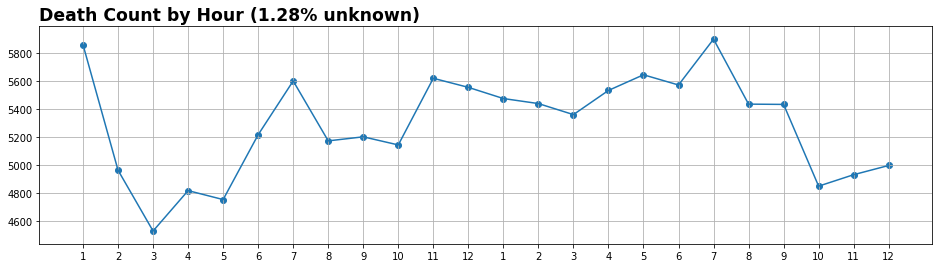

In [17]:
f, ax = plt.subplots(1, 1, figsize=(16, 4))

# actual plotting
ax.plot(death_count_per_hour__valid['hour'], death_count_per_hour__valid['death_count'])
ax.scatter(death_count_per_hour__valid['hour'], death_count_per_hour__valid['death_count'])

# Setting the title
total_count, _ = deaths.shape
unknown_death_pct = round((death_count_per_hour__unknown['death_count'].sum() / total_count) * 100, 2)
ax.set_title(f'Death Count by Hour ({unknown_death_pct}% unknown)', loc='left', fontdict=PLOT_TITLE_FONTDICT)

# setting xticks
ax.set_xticks(death_count_per_hour__valid['hour'].unique())
ax.set_xticklabels(list(range(1, 13)) * 2)

# grid lines
plt.grid();

In [25]:
print('Top 2 Hours')
for hour, death_count in death_count_per_hour__valid.sort_values(by=['death_count'], ascending=False).head(2).values:
    print(f'Hour: {hour+1:>5} | Count: {death_count}')

Top 2 Hours
Hour:  19.0 | Count: 5900.0
Hour:   1.0 | Count: 5860.0
